### A meshfree method based on the peridynamic model of solid mechanics

In [15]:
!pip install discretize

     ---------------------------------------- 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   --------------------------------------- 978.8/978.8 kB 15.4 MB/s eta 0:00:00
   ---------------------------------------- 46.2/46.2 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  You can safely remove it manually.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from discretize import TensorMesh

In [8]:
class Person(object):

    def __init__(self, name, idnumber):
        self.name = name
        self.idnumber = idnumber

    def display(self):
        print(self.name)
        print(self.idnumber)

    def details(self):
        print("My name is {}".format(self.name))
        print("IdNumber: {}".format(self.idnumber))

class Employee(Person):

    def __init__(self, name, idnumber, salary, post):
        self.salary = salary
        self.post = post

        Person.__init__(self, name, idnumber)

    def details(self):
        print("My name is {}".format(self.name))
        print("IdNumber: {}".format(self.idnumber))
        print("Post: {}".format(self.post))

a = Employee('Rahul', 868012, 200000, "Intern")

#a.display()
a.details()

My name is Rahul
IdNumber: 868012
Post: Intern


In [78]:
class peridynamics(object):
    #
    def __init__(self, rho, E, s0, delta):
        self.rho = rho
        self.E = E
        self.s0 = s0
        self.delta = delta
        self.body_side_length = 50
        self.initial_crack_length = 10
        self.initial_crack_half_length = self.initial_crack_length/2
        self.last_time = 15

    def mesh(self):

        self.n = self.body_side_length
        self.h = (self.last_time-0)/self.n

        self.A = np.zeros((self.n, self.n))
        print(self.A.size)

    # def disc(self):

    #     for i in range(1, self.n):
    #         for j in range(1, self.n):
    #             self.xi = 
    #             self.eta = 


In [79]:
obj = peridynamics(8000, 192, 0.02, 1.6) 

In [80]:
obj.mesh()

2500


t: 0.114 [s], Average temperature: 44.00 Celcius


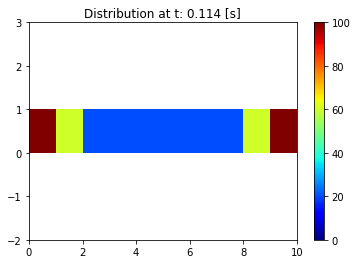

t: 0.227 [s], Average temperature: 48.00 Celcius
t: 0.341 [s], Average temperature: 52.00 Celcius
t: 0.455 [s], Average temperature: 55.00 Celcius
t: 0.568 [s], Average temperature: 58.00 Celcius
t: 0.682 [s], Average temperature: 60.50 Celcius
t: 0.795 [s], Average temperature: 63.00 Celcius
t: 0.909 [s], Average temperature: 65.19 Celcius
t: 1.023 [s], Average temperature: 67.34 Celcius
t: 1.136 [s], Average temperature: 69.28 Celcius
t: 1.250 [s], Average temperature: 71.16 Celcius
t: 1.364 [s], Average temperature: 72.88 Celcius
t: 1.477 [s], Average temperature: 74.54 Celcius
t: 1.591 [s], Average temperature: 76.06 Celcius
t: 1.705 [s], Average temperature: 77.51 Celcius
t: 1.818 [s], Average temperature: 78.86 Celcius
t: 1.932 [s], Average temperature: 80.14 Celcius
t: 2.045 [s], Average temperature: 81.33 Celcius
t: 2.159 [s], Average temperature: 82.46 Celcius
t: 2.273 [s], Average temperature: 83.52 Celcius
t: 2.386 [s], Average temperature: 84.51 Celcius
t: 2.500 [s], Averag

In [84]:
a = 110
length = 50
time = 4
nodes = 10

dx = length/nodes
dt = 0.5 * dx**2 / a #stability
t_nodes = int(time/dt)

u = np.zeros(nodes) + 20

# Boundary conditions
u[0] = 100
u[-1] = 100

fig, axis = plt.subplots()
pcm = axis.pcolormesh([u], cmap = plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=axis)
axis.set_ylim([-2, 3])


counter = 0

while counter < time:

    w = u.copy()
    for i in range(1, nodes-1):
        u[i] = dt* a * (w[i-1]-2 * w[i] + w[i+1])/dx ** 2 + w[i]

    counter += dt

    print("t: {:.3f} [s], Average temperature: {:.2f} Celcius".format(counter, np.average(u)))

    pcm.set_array([u])
    axis.set_title("Distribution at t: {:.3f} [s]".format(counter))
    plt.pause(0.01)

plt.show()